In [1]:
!pip install -U pylabel tqdm

In [2]:
%reset -f

from pylabel         import importer
from IPython.display import Image, display

import os
import zipfile

import numpy as np

In [3]:
#download zip from my ftp

'''
os.makedirs("data", exist_ok=True)

!wget "ftp://192.168.50.1/path/to/folder" -O data/coco2017.zip

with zipfile.ZipFile("data/coco2017.zip", 'r') as zip_ref:
   zip_ref.extractall("data")
'''

'\nos.makedirs("data", exist_ok=True)\n\n!wget "ftp://192.168.50.1/path/to/folder" -O data/coco2017.zip\n\nwith zipfile.ZipFile("data/coco2017.zip", \'r\') as zip_ref:\n   zip_ref.extractall("data")\n'

In [4]:
!pwd

/Users/ning/Downloads


In [5]:
#Specify path to the coco.json file
path_to_annotations = "data/coco/coco.json"

#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "./images"

#Import the dataset into the pylable schema 
coco = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="coco")

In [6]:
coco.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,./images,iroccv-t09-carid-20230201-085604_v0_00555.jpg,,0,704,576,,,62.0,105.0,...,,0.0,,,,0,carid,,,1
1,./images,iroccv-t09-carid-20230201-085605_v0_00645.jpg,,1,704,576,,,,,...,,,,,,,,,,1
2,./images,iroccv-t09-carid-20230201-085607_v0_01200.jpg,,2,704,576,,,345.0,161.0,...,,0.0,,,,0,carid,,,1
3,./images,iroccv-t09-carid-20230201-085609_v0_00375.jpg,,3,704,576,,,,,...,,,,,,,,,,1
4,./images,iroccv-t09-carid-20230201-085112-clone_v0_0457...,,4,704,576,,,473.0,177.0,...,,0.0,,,,0,carid,,,1


In [7]:
print(f"Number of images: {coco.analyze.num_images}")
print(f"Number of classes: {coco.analyze.num_classes}")
print(f"Classes:{coco.analyze.classes}")
print(f"Class counts:\n{coco.analyze.class_counts}")
print(f"Path to annotations:\n{coco.path_to_annotations}")

Number of images: 832
Number of classes: 1
Classes:['carid']
Class counts:
         535
carid    297
Name: cat_name, dtype: int64
Path to annotations:
data/coco


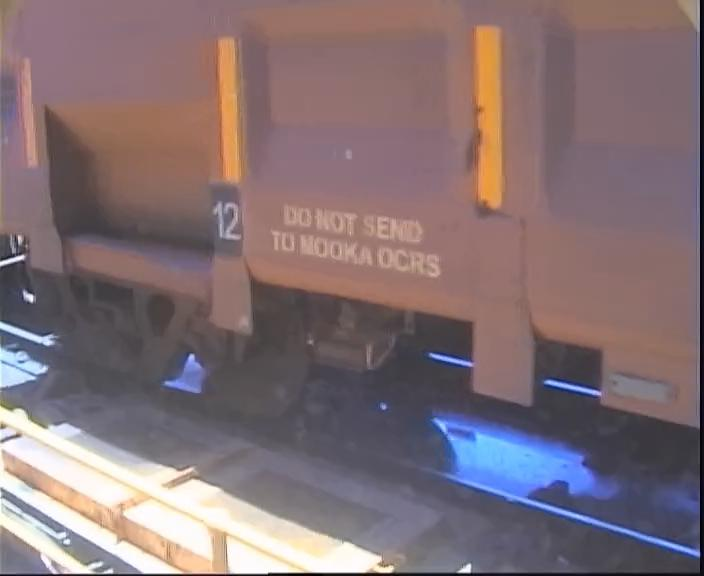

In [8]:
display(coco.visualize.ShowBoundingBoxes(90))

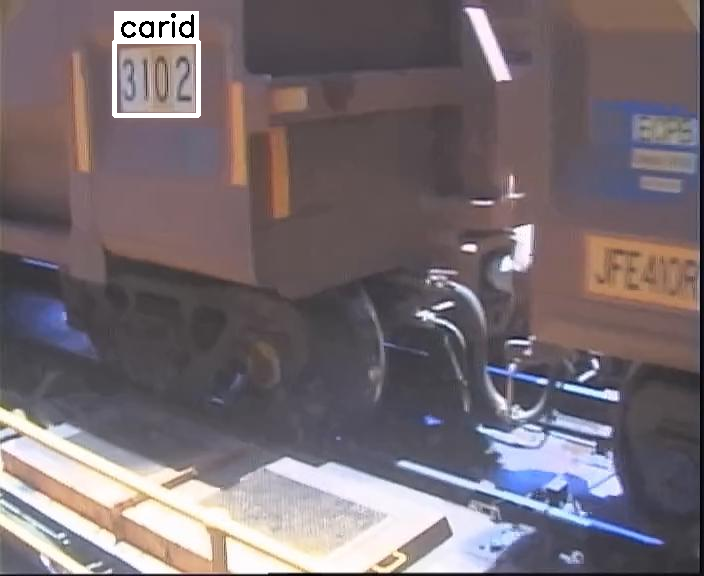

In [9]:
display(coco.visualize.ShowBoundingBoxes("iroccv-t09-carid-20230201-085607_v0_00615.jpg"))

In [10]:
coco.path_to_annotations = "data/yolo"
coco.export.ExportToYoloV5()[0]

Exporting YOLO files...: 100%|██████████| 832/832 [00:00<00:00, 2157.04it/s]


'training/dataset.yaml'

In [11]:
!cp -rf ./data/coco/images ./training/

In [12]:
coco.df.cat_id.unique()

array(['0', nan], dtype=object)

In [13]:
coco.df.columns

Index(['img_folder', 'img_filename', 'img_path', 'img_id', 'img_width',
       'img_height', 'img_depth', 'ann_segmented', 'ann_bbox_xmin',
       'ann_bbox_ymin', 'ann_bbox_xmax', 'ann_bbox_ymax', 'ann_bbox_width',
       'ann_bbox_height', 'ann_area', 'ann_segmentation', 'ann_iscrowd',
       'ann_pose', 'ann_truncated', 'ann_difficult', 'cat_id', 'cat_name',
       'cat_supercategory', 'split', 'annotated'],
      dtype='object')

In [14]:
df = coco.df

In [15]:
df['file_path'] = df['img_folder'] + "/" + df['img_filename']

id0_filepath = df.loc[df['cat_id']=='0']['file_path']

id0_size = id0_filepath.size

train_subindex_id0 = np.sort( np.random.choice(id0_size, round(id0_size * 0.75), replace=False) )
valid_subindex_id0 = np.delete(np.arange(0,id0_size), train_subindex_id0)

train_path_id0 = id0_filepath.iloc[train_subindex_id0]
valid_path_id0 = id0_filepath.iloc[valid_subindex_id0]

In [16]:
id1_filepath = df.loc[df['cat_id']!='0']['file_path']

id1_size = id1_filepath.size

train_subindex_id1 = np.sort( np.random.choice(id1_size, round(id1_size * 0.75), replace=False) )
valid_subindex_id1 = np.delete(np.arange(0,id1_size), train_subindex_id1)

train_path_id1 = id1_filepath.iloc[train_subindex_id1]
valid_path_id1 = id1_filepath.iloc[valid_subindex_id1]

In [17]:
train_path_id0.to_csv('./train_id0.txt', header=None, index=None, sep=' ', mode='a')
train_path_id1.to_csv('./train_id1.txt', header=None, index=None, sep=' ', mode='a')

filenames = ['train_id0.txt', 'train_id1.txt']
with open('./train.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)
                
!rm -rf train_id0.txt train_id1.txt

In [18]:
valid_path_id0.to_csv('./valid_id0.txt', header=None, index=None, sep=' ', mode='a')
valid_path_id1.to_csv('./valid_id1.txt', header=None, index=None, sep=' ', mode='a')

filenames = ['valid_id0.txt', 'valid_id1.txt']
with open('./valid.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)
                
!rm -rf valid_id0.txt valid_id1.txt

In [19]:
!mv ./training ./dataset
!mv ./*.txt ./dataset